# Import necessary libraries

In [1]:
import pandas as pd
import sys
import os
import logging

print(os.getcwd())
os.chdir(r'c:\Users\habteyes.asfaw\10Accadamy\Rossmann-Sales-Prediction'
)
import src.data_preprocessing as prep
from src.logger import get_logger



c:\Users\habteyes.asfaw\10Accadamy\Rossmann-Sales-Prediction\notebooks


In [2]:
from src.data_preprocessing import handle_missing_values,merge_store_data, encode_categorical, extract_date_features, feature_scaling, preprocess_data
from src.model import  train_random_forest, evaluate_model, plot_feature_importance, confidence_intervals, save_model



# Set up logging


In [3]:
logger = logging.getLogger()

# Load Data

In [4]:

sample_df = pd.read_csv('data/sample_submission.csv')
test_df = pd.read_csv('data/test.csv')
store_df = pd.read_csv('data/store.csv')
train_df = pd.read_csv('data/train.csv')




C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_4632\2098446915.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('data/train.csv')


# Preprocess the data


## Merge the store data with train and test datasets

In [5]:
train_merged, test_merged = prep.merge_store_data(train_df, test_df, store_df)


In [6]:
print("Train columns:", train_merged.columns)


Train columns: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [7]:
train_merged.columns = train_merged.columns.str.strip()
test_merged.columns = test_merged.columns.str.strip()

In [8]:
train_merged['Date'] = pd.to_datetime(train_merged['Date'], errors='coerce')
test_merged['Date'] = pd.to_datetime(test_merged['Date'], errors='coerce')

## Preprocess the merged training and test data

In [9]:
train_processed = prep.preprocess_data(train_merged, 'Date')
test_processed = prep.preprocess_data(test_merged, 'Date')

# Prepare features and target


In [10]:
features = ['Store', 'DayOfWeek', 'Promo', 'Open'] # Features for modeling
target = 'Sales' # Target variable
X = train_df[features]
y = train_df[target]

# Train Random Forest model


In [11]:
best_model, val_score = train_random_forest(X, y)


# Model Evaluation


In [12]:
X_val = X.iloc[int(0.8 * len(X)):] # Validation data for evaluation
y_val = y.iloc[int(0.8 * len(y)):]
y_pred = best_model.predict(X_val) # Predictions on validation datas
mae, mse = evaluate_model(y_val, y_pred) # Calculate MAE and MSE
print(f'MAE: {mae}, MSE: {mse}') # Display MAE and MSE

MAE: 666.3687988356545, MSE: 1059888.825849438


# Feature Importance Plot


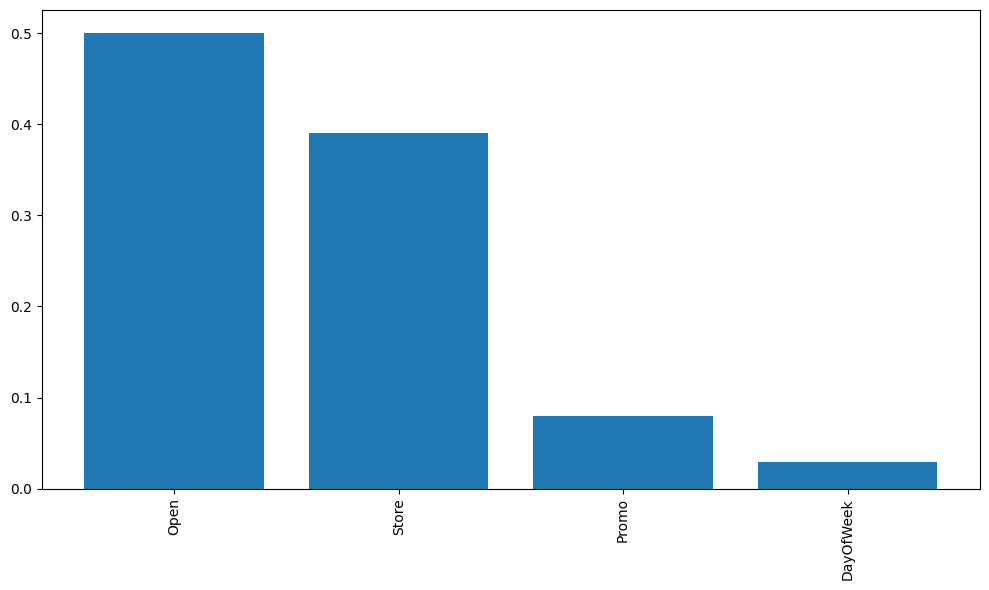

In [13]:
plot_feature_importance(best_model, features) # Display feature importances

# Calculate Confidence Intervals for Predictions



In [14]:
lower_bound, upper_bound = confidence_intervals(y_pred) # Get confidence intervals
print(f'95% Confidence Interval: Lower={lower_bound}, Upper={upper_bound}') # Display confidence interval

95% Confidence Interval: Lower=5721.191501055691, Upper=5753.944847282548


# Save the model


In [15]:
save_model(best_model) # Save the trained model